# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)


In [ ]:
#first improt libraries.
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#1-Twitter Archive
# Read CSV file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)


In [ ]:
# Download file using Requests library via URL provided 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [ ]:
# Save the file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)


In [ ]:
#I Dont have access for twitter devloper account 
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [ ]:
# Download file using Requests library via URL provided 
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

# Save the file
with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [ ]:
# Read downloaded txt file line by line into a pandas DataFrame
df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


**I'll assess the data both visually and programmatically to identify any data quality(content) issues and tidiness(structual) issues.**

In [ ]:
# Assess the twitter_archive visually
twitter_archive.head(2356)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [ ]:
# Assess the image_prediction visually
image_prediction.head(2075)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [ ]:
# Assess the tweet_json visually
tweet_json.head(2354)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


# **Programmatic assessment**  


1.  Archive Dataframe Analysis




In [ ]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [ ]:
twitter_archive.duplicated().sum()

0

In [ ]:
twitter_archive.tweet_id.duplicated().sum()

0

In [ ]:
#Check Formula of rating_numerator 
twitter_archive.rating_numerator.value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
2       9  
1       9  
75      2  
15      2  
420     2  
0       2  
80      1  
144     1  
17      1  
26      1  
20      1  
121     1  
143     1  
44      1  
60      1  
45      1  
50      1  
99      1  
204     1  
1776    1  
165     1  
666     1  
27      1  
182     1  
24      1  
960     1  
84      1  
88      1  
Name: rating_numerator, dtype: int64

In [ ]:
# To Double check is corecte rating 
print(twitter_archive.loc[twitter_archive.rating_numerator == 204, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 144, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 666, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 182, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 960, 'text'])

1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Name: text, dtype: object
189    @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
Name: text, dtype: object
290    @markhoppus 182/10
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object


In [ ]:
#print whole text in order to verify numerators and denominators
#17 dogs
print(twitter_archive['text'][1120]) 
#12 dogs
print(twitter_archive['text'][1779])
#No picture, this will be ignored when cleaning data
print(twitter_archive['text'][189]) 
#No picture, this will be ignored when cleaning data and have two rating 
print(twitter_archive['text'][290]) 
##just a tweet to explain actual ratings, this will be ignored when cleaning data
print(twitter_archive['text'][313]) 

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
@markhoppus 182/10
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


In [ ]:
#Check Formula of rating_denominator
twitter_archive.rating_denominator.value_counts()


10     2333
11     3   
50     3   
20     2   
80     2   
70     1   
7      1   
15     1   
150    1   
170    1   
0      1   
90     1   
40     1   
130    1   
110    1   
16     1   
120    1   
2      1   
Name: rating_denominator, dtype: int64

In [ ]:
print(twitter_archive.loc[twitter_archive.rating_denominator == 11, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 2, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 16, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 15, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 7, 'text'])

784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1662    This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5 
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and

In [ ]:
#retweet - it will be deleted when delete all retweets
print(twitter_archive['text'][784]) 
#actual rating 14/10 need to change manually
print(twitter_archive['text'][1068]) 
#actual rating 10/10 need to change manually
print(twitter_archive['text'][1662]) 
#actual rating 9/10 need to change manually
print(twitter_archive['text'][2335]) 
#tweet to explain rating
print(twitter_archive['text'][1663]) 
#no rating - delete
print(twitter_archive['text'][342]) 
#no rating - delete
print(twitter_archive['text'][516]) 

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [ ]:
twitter_archive['name'].value_counts()

None          745
a             55 
Charlie       12 
Cooper        11 
Lucy          11 
              .. 
Dex           1  
Ace           1  
Tayzie        1  
Grizzie       1  
Christoper    1  
Name: name, Length: 957, dtype: int64

In [ ]:
twitter_archive.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [ ]:
twitter_archive.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [ ]:
twitter_archive.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [ ]:
twitter_archive.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

# Quality issues in twitter archive is : 
* in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, 
retweeted_status_user_id are float, should all be int or remove it 

* only need original ratings with pictures, retweets and replies entries should be removed, , related columns should be removed too. 
* The picture part will be fixed later.
* Timestamp is str, should be datetime, remove +0000 in timestamp .
* Abnormal values in rating_denominator, e.g., 170, 144, 130, etc. The rating_denominator is almost always 10.
* Abnormal values in rating_numerator, e.g., 1776, 960, 666, 204, 165,etc. make no sense.

2. Image Dataframe Analysis

In [ ]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
519,676496375194980353,https://pbs.twimg.com/media/CWNl3S9WcAARN34.jpg,1,pug,0.985387,True,Norwegian_elkhound,0.004417,True,French_bulldog,0.003893,True
370,672975131468300288,https://pbs.twimg.com/media/CVbjRSIWsAElw2s.jpg,1,pug,0.836421,True,Brabancon_griffon,0.044668,True,French_bulldog,0.036570,True
948,704819833553219584,https://pbs.twimg.com/media/CcgF5ovW8AACrEU.jpg,1,guinea_pig,0.994776,False,hamster,0.004069,False,wood_rabbit,0.000206,False
1110,724004602748780546,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,Siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False
1384,765719909049503744,https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg,1,golden_retriever,0.969518,True,Labrador_retriever,0.021696,True,Border_terrier,0.002075,True


In [ ]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [ ]:
image_prediction.tweet_id.duplicated().sum()

0

In [ ]:
image_prediction.jpg_url.duplicated().sum()

66

In [ ]:
image_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
                      .. 
pillow                1  
carousel              1  
bald_eagle            1  
lorikeet              1  
orange                1  
Name: p1, Length: 378, dtype: int64

In [ ]:
image_prediction.p2.value_counts()

Labrador_retriever    104
golden_retriever      92 
Cardigan              73 
Chihuahua             44 
Pomeranian            42 
                      .. 
medicine_chest        1  
quail                 1  
horse_cart            1  
waffle_iron           1  
bagel                 1  
Name: p2, Length: 405, dtype: int64

In [ ]:
image_prediction.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                    1 
assault_rifle         1 
axolotl               1 
pot                   1 
banana                1 
Name: p3, Length: 408, dtype: int64

Quality issues in image prediction is :

* inconsistent capitalization in p1, p2 and p3 columns
* There is a duplicates of 66 times for jpg url  
* many entries are not dogs, e.g., jaguar, mailbox, peacock, cloak, etc.
* we only need the most confident prediction for dog breed for this analysis

3. Tweet_json table

In [ ]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [ ]:
tweet_json.duplicated().sum()

0

Quality issues in tweet_json is :

* missing data probably due to retweets in twitter_archive

### Tidiness issues
1. Doggo, floofer, pupper, puppo are all stages of dog, should be in one column in twitter_archive table.

2. Image prediction should be part of the twitter_archive table

3. Tweet json should be part of the twitter_archive table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).


In [ ]:
# Make copys for all the data
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1:

Delete retweets and replies in twitter_archive table 

#### Define:

Use isnull() to filter and only keep rows where retweeted_status_id column is NaN. Same method applies to in_reply_to_status_id


#### Code

In [ ]:
# Remove retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

# Remove replies
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

#### Test


In [ ]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2:


Drop columns that are related to retweets and replies. After dropping those columns, datatype issue with those columns will no longer be an issue

#### Define:
Use df.drop to delete in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns.


#### Code

In [ ]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 
                            'in_reply_to_user_id',
                            'retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp'],axis=1)

#### Test


In [ ]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #3:

Datatype for timestamp should be datetime, remove +0000

#### Define:
Remove +0000 and use pd.to_datetime to convert timestamp from str to datetime

#### Code

In [ ]:
# Remove +0000
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.str[:-6]

# Convert to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [ ]:
twitter_archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Issue #4:

First Tidiness issue >> Create one column for the various dog types: doggo, floofer, pupper, puppo

#### Define:  Use pd.melt to melt the doggo, floofer, pupper and puppo columns to a type and dog_stage column. Drop the intermediate column.



#### Code

In [ ]:
# Melt the doggo, floofer, pupper and puppo columns to type and dogs_stage column
twitter_archive_clean = pd.melt(twitter_archive_clean, 
                                id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                                value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                                var_name = 'type', 
                                value_name = 'dog_stage')

# Drop type column  
twitter_archive_clean.drop('type', 1, inplace = True)

# Sort by dog_stage and drop duplicates
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

<ipython-input-154-449ba7a647d0>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  twitter_archive_clean.drop('type', 1, inplace = True)


#### Test

In [ ]:
twitter_archive_clean.dog_stage.value_counts()

None       1761
pupper     230 
doggo      72  
puppo      24  
floofer    10  
Name: dog_stage, dtype: int64

### Issue #5:

image_prediction: delete entries that are not dogs. Same with twitter_archive and tweet_json. Many abnormal rating values would be gone, making it easier to fix abnormal rating issues in rating_denominator and rating_numerator.

#### Define:
use isin and ~ to filter and delete rows that are False in p1_dog, p2_dog, p3_dog column in all three dataframes.



#### Code

In [ ]:
# Number of rows before data cleaning
print(image_prediction_clean.shape)
print(twitter_archive_clean.shape)

(2075, 12)
(2097, 9)


In [ ]:
# Filter posts that are not dogs and put those tweet_id into a drop_list
image_prediction_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id
drop_list = image_prediction_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id

# Drop the rows with tweet_id in the drop_list in all dataframes
image_prediction_clean = image_prediction_clean[~image_prediction_clean.tweet_id.isin(drop_list)]
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(drop_list)]
tweet_json_clean = tweet_json_clean[~tweet_json_clean.tweet_id.isin(drop_list)]

#### Test

In [ ]:
# Number of rows after data cleaning
print(image_prediction_clean.shape)
print(twitter_archive_clean.shape)
print(tweet_json_clean.shape)

(1751, 12)
(1792, 9)
(2031, 3)


### Issue #6:

twitter_archive: abnormal values in rating_denominator. According to the project overview, the ratings almost always have a denominator of 10. Many abnormal rating values were gone after removing ratings not for dogs, making it easier to fix abnormal rating.

#### Define:
Create new dataframe with tweet_id, text, rating_numerator, rating_denominator columns. Filter rating_denominator not equal to 10 and check the text to correct these ratings.

#### Code

In [ ]:
# Create new dataframe with selected columns
df_abnormal_rating = twitter_archive_clean[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

# Filter rating_denominator not equal to 10
df_abnormal_denominator = df_abnormal_rating.query('rating_denominator != 10')

# Display full text
pd.set_option('display.max_colwidth', -1)

df_abnormal_denominator

<ipython-input-159-6208f80cec2f>:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,tweet_id,text,rating_numerator,rating_denominator
2076,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2
3307,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
3496,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
3523,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
3133,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
3108,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
3153,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
3045,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
3082,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
3226,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


In [ ]:
# Correct ratings by reading through the text, most of the abnormal ratings are associated with multiple dogs.
# tweet_id: 666287406224695296
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10
# tweet_id: 697463031882764288 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 697463031882764288, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 697463031882764288, 'rating_denominator'] = 10
# tweet_id: 684222868335505415 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 684222868335505415, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 684222868335505415, 'rating_denominator'] = 10
# tweet_id: 682962037429899265 
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, 'rating_denominator'] = 10
# tweet_id: 710658690886586372 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 710658690886586372, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 710658690886586372, 'rating_denominator'] = 10
# tweet_id: 713900603437621249 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 713900603437621249, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 713900603437621249, 'rating_denominator'] = 10
# tweet_id: 709198395643068416 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 709198395643068416, 'rating_numerator'] = 9
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 709198395643068416, 'rating_denominator'] = 10
# tweet_id: 722974582966214656 
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 13
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 10
# tweet_id: 716439118184652801
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 10
# tweet_id: 704054845121142784 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 704054845121142784, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 704054845121142784, 'rating_denominator'] = 10
# tweet_id: 677716515794329600 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 677716515794329600, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 677716515794329600, 'rating_denominator'] = 10
# tweet_id: 675853064436391936 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 675853064436391936, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 675853064436391936, 'rating_denominator'] = 10
# tweet_id: 810984652412424192  no rating
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 810984652412424192, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 810984652412424192, 'rating_denominator'] = 10
# tweet_id: 820690176645140481 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 820690176645140481, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 820690176645140481, 'rating_denominator'] = 10
# tweet_id: 731156023742988288 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 731156023742988288, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 731156023742988288, 'rating_denominator'] = 10
# tweet_id: 758467244762497024 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 758467244762497024, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 758467244762497024, 'rating_denominator'] = 10
# tweet_id: 740373189193256964
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10

#### Test

In [ ]:
twitter_archive_clean.rating_denominator.value_counts()

10    1792
Name: rating_denominator, dtype: int64

### Issue #7:

twitter_archive: abnormal values in rating_numerator. Many abnormal rating values were gone after removing ratings not for dogs.

#### Define:
Use value_counts to see abnormal values and check the text to correct the ratings.
Use isin and ~ to remove entires that are not dogs

#### Code

In [ ]:
twitter_archive_clean.rating_numerator.value_counts()

12    464
10    380
11    379
13    256
9     136
8     71 
7     31 
14    27 
6     16 
5     15 
4     6  
3     5  
2     2  
26    1  
75    1  
0     1  
27    1  
Name: rating_numerator, dtype: int64

In [ ]:
# rating_numerator 75, 26, 27, 0
df_abnormal_rating.query('rating_numerator == 75 or rating_numerator == 26 or rating_numerator == 27 or rating_numerator == 0')

,tweet_id,text,rating_numerator,rating_denominator
3571,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10
2625,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
2343,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
4780,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


In [ ]:
# Correct the ratings
# tweet_id: 786709082849828864, rating _numberator should be 9.75 according to the text
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75
# tweet_id: 680494726643068929, rating _numberator should be 11.26 according to the text
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26
# tweet_id: 778027034220126208, rating _numberator should be 11.27 according to the text
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27
# tweet_id: 835152434251116546
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 835152434251116546, 'rating_numerator'] = 11

In [ ]:
# rating_numerator 3 and 4
df_abnormal_rating.query('rating_numerator == 3 or rating_numerator == 4')

,tweet_id,text,rating_numerator,rating_denominator
2030,667176164155375616,These are strange dogs. All have toupees. Long neck for dogs. In a shed of sorts? Work in groups? 4/10 still petable https://t.co/PZxSarAfSN,4,10
2057,666649482315059201,Cool dog. Enjoys couch. Low monotone bark. Very nice kicks. Pisses milk (must be rare). Can't go down stairs. 4/10 https://t.co/vXMKrJC81s,4,10
3128,711306686208872448,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,3,10
3069,718246886998687744,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,3,10
3045,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
3181,707420581654872064,This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,4,10
3914,671122204919246848,Two miniature golden retrievers here. Webbed paws. Don't walk very efficiently. Can't catch a tennis ball. 4/10s https://t.co/WzVLdSHJU7,4,10
4025,668989615043424256,This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh https://t.co/1zBp1moFlX,3,10
3560,680940246314430465,This is Alice. She's an idiot. 4/10 https://t.co/VQXdwJfkyS,4,10
3785,673906403526995968,Guys I'm getting real tired of this. We only rate dogs. Please don't send in other things like this Bulbasaur. 3/10 https://t.co/t5rQHl6W8M,3,10


rating_numerator = 3, not dog, delete

1.   777885040357281792:
2.   718246886998687744:
3.   673906403526995968:


rating_numerator = 4, not dog, delete

1. 707420581654872064
2. 680940246314430465
3. 671122204919246848
4. 667176164155375616
5. 666649482315059201

In [ ]:
# Remove entries that are not dogs
id_list = [777885040357281792, 718246886998687744, 673906403526995968, 707420581654872064, 680940246314430465, 671122204919246848, 667176164155375616, 666649482315059201]
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(id_list)]

#### Test

In [ ]:
twitter_archive_clean.rating_numerator.value_counts()

12.00    464
11.00    380
10.00    380
13.00    256
9.00     136
8.00     71 
7.00     31 
14.00    27 
6.00     16 
5.00     15 
2.00     2  
3.00     2  
11.26    1  
9.75     1  
4.00     1  
11.27    1  
Name: rating_numerator, dtype: int64

Limitation: there are still other rating issues, for example some rating are not for dogs even after removing many entries in the image prediction table. It's not practical to read each of these.

### Issue #8:

image_prediction: we only need the most confident prediction for the image

#### Define:
Create two columns breed, confident_level
Create a function to look through the preditions and find the most confident prediction that is a dog breed. p1 is the most confident prediction, followed by p2 and p3
Remove other columns not needed.

#### Code

In [ ]:
# Create a breed column and a confident_level column
breed = []
confident_level = []

# Create a function to find the most confident prediction that is a dog breed
# p1 is the most confident prediction, followed by p2 and p3
def image_pred(image_prediction_clean):
    if image_prediction_clean.p1_dog == True:
        breed.append(image_prediction_clean.p1)
        confident_level.append(image_prediction_clean.p1_conf)
    elif image_prediction_clean.p2_dog == True:
        breed.append(image_prediction_clean.p2)
        confident_level.append(image_prediction_clean.p2_conf)
    elif image_prediction_clean.p3_dog == True:
        breed.append(image_prediction_clean.p3)
        confident_level.append(image_prediction_clean.p3_conf)
    else:
        breed.append('Unknown_breed')
        confident_level.append(0)
        
# Apply the function by column        
image_prediction_clean.apply(image_pred, axis=1)

# Add the breed and confident_level column to image_prediction_clean 
image_prediction_clean['breed'] = breed
image_prediction_clean['confident_level'] = confident_level

# Drop columns no longer needed
image_prediction_clean = image_prediction_clean.drop(['img_num',
                                                      'p1','p1_conf','p1_dog',
                                                      'p2','p2_conf','p2_dog',
                                                      'p3','p3_conf','p3_dog'],axis=1)

#### Test

In [ ]:
image_prediction_clean.head()

,tweet_id,jpg_url,breed,confident_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### Issue #9:

image_prediction: inconsistent capitalization in p1 column

#### Define:
Use str.capitalize to capitalize the first letter

#### Code

In [ ]:
image_prediction_clean.breed = image_prediction_clean.breed.str.capitalize()

#### Test

In [ ]:
image_prediction_clean.head(10)

,tweet_id,jpg_url,breed,confident_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,Chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,Golden_retriever,0.775930


### Issue #10:

Merge the clean versions of twitter_archive, image_predictions, and tweet_json dataframes to work in one table and fixed all issue easily 

#### Define:
The most clean, comprehensible way of merging multiple dataframe if complex queries aren't involved.

Just simply merge with DATE as the index and merge using OUTER method (to get all the data).

#### Code

In [ ]:
# First Merge the retweet_count, favorite_count column to the twitter_archive table, joining on tweet_id .
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean,
                            on = ['tweet_id'], how = 'left')

In [ ]:
# display The twitter_archive_clean 
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7.0,10,Biden,None,234,489
1,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12.0,10,None,None,89,326
2,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11.0,10,Cupcake,None,96,327
3,667455448082227200,2015-11-19 21:32:34,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK,https://twitter.com/dog_rates/status/667455448082227200/photo/1,7.0,10,Reese,None,66,203
4,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11.0,10,a,None,102,273


#### Test

In [ ]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'retweet_count', 'favorite_count'],
      dtype='object')

### Issue #11:

 image_prediction should be part of the twitter_archive table. Since we only want original ratings that have images, only keep rows with images.

#### Define:
Use merge to merge the image_prediction table to the twitter_archive table, joining on tweet_id.
Use notnull to filter nonnull rows and only keep nonnull rows.

#### Code

In [ ]:
# Merge tables
twitter_archive_clean = pd.merge(twitter_archive_clean, image_prediction_clean,
                            on = ['tweet_id'], how = 'left')

# number of null values before cleaning
twitter_archive_clean.jpg_url.isnull().sum()

126

In [ ]:
twitter_archive_clean = (twitter_archive_clean[twitter_archive_clean.jpg_url.notnull()])

#### Test

In [ ]:
# number of null values after cleaning
twitter_archive_clean.jpg_url.isnull().sum()

0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".


In [ ]:
# View the dataframe
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,confident_level
0,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7.0,10,Biden,None,234,489,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,Saint_bernard,0.381377
1,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12.0,10,None,None,89,326,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091
2,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11.0,10,Cupcake,None,96,327,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.825670
3,667455448082227200,2015-11-19 21:32:34,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK,https://twitter.com/dog_rates/status/667455448082227200/photo/1,7.0,10,Reese,None,66,203,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376
4,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11.0,10,a,None,102,273,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,Toy_poodle,0.304175


In [ ]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 1783
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1658 non-null   int64         
 1   timestamp           1658 non-null   datetime64[ns]
 2   source              1658 non-null   object        
 3   text                1658 non-null   object        
 4   expanded_urls       1658 non-null   object        
 5   rating_numerator    1658 non-null   float64       
 6   rating_denominator  1658 non-null   int64         
 7   name                1658 non-null   object        
 8   dog_stage           1658 non-null   object        
 9   retweet_count       1658 non-null   int64         
 10  favorite_count      1658 non-null   int64         
 11  jpg_url             1658 non-null   object        
 12  breed               1658 non-null   object        
 13  confident_level     1658 non-null   float64     

In [ ]:
# Store the clean dataframe in a CSV file named twitter_archive_master.csv
twitter_archive_clean.to_csv('twitter_archive_master.csv')

# load data to a dataframe
df = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**


### Insights:
1.The most popular dog names ?

2.What is the most common dog stage?

3.The Max number of retweet counts and favorite counts ?

### Visualization


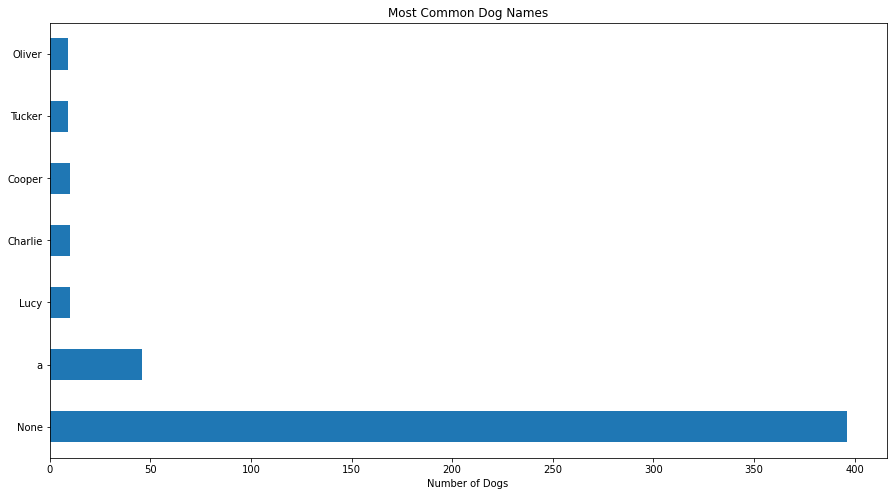

In [ ]:
# 1. The Most popular dog names 
df.name.value_counts()[0:7].plot(kind = 'barh',figsize=(15,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");


In [ ]:
df.name.value_counts()

None       396
a          46 
Lucy       10 
Charlie    10 
Cooper     10 
           .. 
Dug        1  
Saydee     1  
Billl      1  
Ronduh     1  
Stuart     1  
Name: name, Length: 848, dtype: int64

The three most popular dog names are:

* Lucy - 10
* Charlie - 10
* Cooper - 10 and so on

In [ ]:
# 2. What is most common dog stage 
# Dog stage and count
df.dog_stage.value_counts(normalize=True)

None       0.844994
pupper     0.104343
doggo      0.032569
puppo      0.013269
floofer    0.004825
Name: dog_stage, dtype: float64

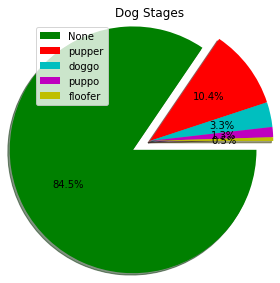

In [ ]:
# Plot pie chart
labels = ['None', 'pupper', 'doggo', 'puppo', 'floofer']
values = df.dog_stage.value_counts(normalize=True)
colors = ['g', 'r', 'c' ,'m', 'y']
explode = (0.2, 0, 0, 0, 0)

plt.pie(values, colors=colors, explode=explode, autopct='%1.1f%%', radius = 1.3, shadow=True, counterclock=False)
plt.legend(labels, loc=0)
plt.title('Dog Stages')
plt.tight_layout()

From the pie chart we can see that more than 84% of the tweets do not provide dog stage information in the post. For those have the stage information, pupper is most common stage  = 10.4 % among all those tweets.

In [ ]:
# 3.The Max number of retweet counts and favorite counts?
# Scatterplot of retweets vs favorite count

print("The Max number of retweet counts =",df.retweet_count.max())
print("The Min number of retweet counts =",df.retweet_count.min())
print("The Max number of favorite counts =",df.favorite_count.max())
print("The Min number of favorite counts =",df.favorite_count.min())

The Max number of retweet counts = 79515
The Min number of retweet counts = 16
The Max number of favorite counts = 132810
The Min number of favorite counts = 81
